In [3]:
import tensorflow as tf 
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [5]:
data = tf.keras.utils.image_dataset_from_directory('./train')

Found 7601 files belonging to 26 classes.


In [9]:
data_iterator = data.as_numpy_iterator()  # allow to loop through it
batch = data_iterator.next() # für eine Werte: neu laden
len(batch)
batch[0]  #  -> image
batch[1]  #  -> label

array([25, 20,  8,  3, 20, 10,  3, 23, 22,  8,  8,  7, 17,  3, 10, 21, 18,
       15, 17, 23, 14,  9, 23,  9,  7, 10, 22, 22, 22, 11, 11, 16])

jeder Buchstabe ist einer Zahl zugeordnet: 0 - 25

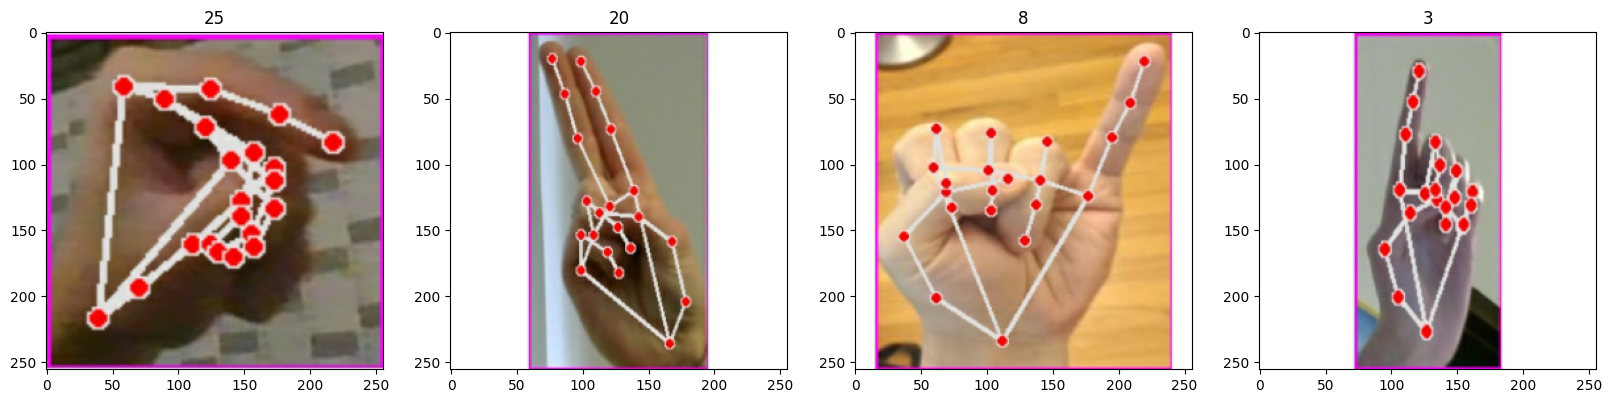

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Pre-Pro_cess

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

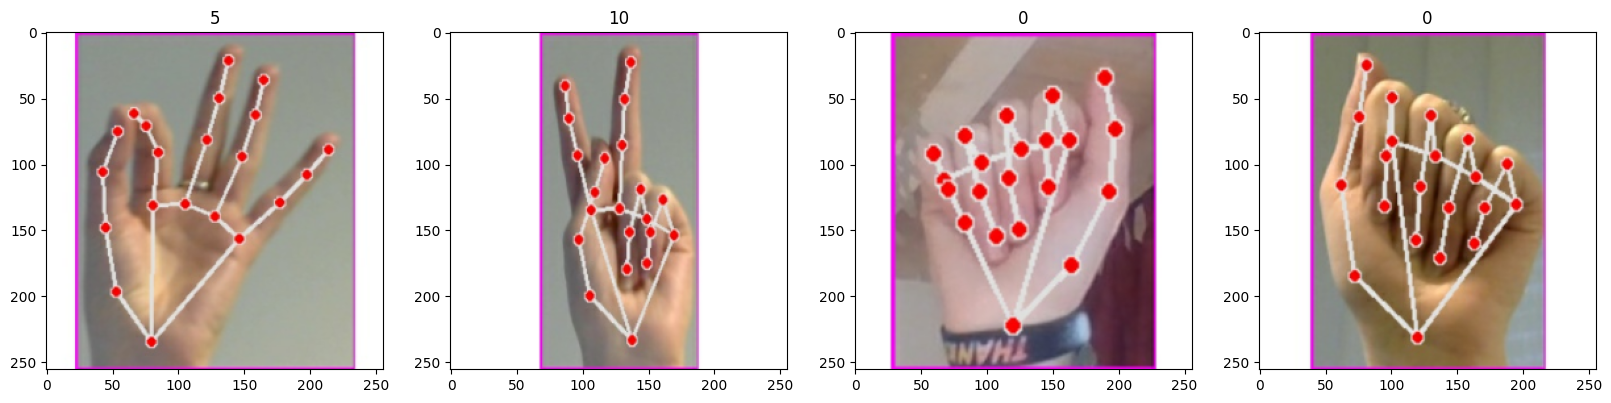

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
len(data)

238

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [16]:
test_size+ train_size+ val_size

238

evtl. muss noch shuffle

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)